<a href="https://colab.research.google.com/github/rontalapoojareddy/DeepLearning1/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2503B05130**

**R.Pooja Reddy**

**M.Tech CSE**

**1.Set Up Environment and Load Data**

**Install Required Libraries**

In [1]:
!pip install transformers datasets accelerate evaluate -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.5 MB/s eta 0:00:00


**Import Libraries**

In [2]:
import torch
from datasets import load_dataset
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForMaskedLM,
    DataCollatorForLanguageModeling,
    Trainer,
    TrainingArguments
)
import evaluate
import numpy as np


**Load Dataset**

In [3]:
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")
print(dataset)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

wikitext-2-raw-v1/test-00000-of-00001.pa(…):   0%|          | 0.00/733k [00:00<?, ?B/s]

wikitext-2-raw-v1/train-00000-of-00001.p(…):   0%|          | 0.00/6.36M [00:00<?, ?B/s]

wikitext-2-raw-v1/validation-00000-of-00(…):   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['text'],
        num_rows: 4358
    })
    train: Dataset({
        features: ['text'],
        num_rows: 36718
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3760
    })
})


**2.Preprocess Dataset**

**Load Tokenizer**

In [4]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

**Tokenization Function**

In [5]:
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )


**Apply Tokenization**

In [6]:
tokenized_datasets = dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=["text"]
)


Map:   0%|          | 0/4358 [00:00<?, ? examples/s]

Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

Map:   0%|          | 0/3760 [00:00<?, ? examples/s]

**Save Preprocessed Dataset (Deliverable a)**

In [7]:
tokenized_datasets.save_to_disk("mlm_tokenized_dataset")


Saving the dataset (0/1 shards):   0%|          | 0/4358 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/36718 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3760 [00:00<?, ? examples/s]

**3.Create Masked Data Collator**

In [8]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)


**4.Load Pre-trained DistilBERT Model**

In [9]:
model = DistilBertForMaskedLM.from_pretrained("distilbert-base-uncased")


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/105 [00:00<?, ?it/s]

**5.Training**

**Define Training Arguments**

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


DistilBertForMaskedLM(
  (activation): GELUActivation()
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSelfAttention(
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0

**Trainer Setup**

In [11]:
training_args = TrainingArguments(
    output_dir="./distilbert-mlm",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs"
)


`logging_dir` is deprecated and will be removed in v5.2. Please set `TENSORBOARD_LOGGING_DIR` instead.


**Check Version**

In [12]:
import transformers
print(transformers.__version__)


5.0.0


**Create Trainer**

In [13]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
)


**Train Model**

In [17]:

trainer.train()



Step,Training Loss
500,2.175756
1000,2.112045
1500,2.113747
2000,2.106375
2500,2.046973
3000,1.955357
3500,1.970599
4000,1.949005
4500,1.967678
5000,1.886023


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

TrainOutput(global_step=6885, training_loss=1.9839238096859113, metrics={'train_runtime': 2363.0214, 'train_samples_per_second': 46.616, 'train_steps_per_second': 2.914, 'total_flos': 3650535397149696.0, 'train_loss': 1.9839238096859113, 'epoch': 3.0})

**Save Trained Model (Deliverable b)**

In [18]:
trainer.save_model("./distilbert-mlm-model")
tokenizer.save_pretrained("./distilbert-mlm-model")


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

('./distilbert-mlm-model/tokenizer_config.json',
 './distilbert-mlm-model/tokenizer.json')

**6.Evaluation and Analysis (Deliverable c)**

**Evaluate**

In [14]:
eval_results = trainer.evaluate()
print(eval_results)


{'eval_loss': 2.600942850112915, 'eval_model_preparation_time': 0.0126, 'eval_runtime': 22.5231, 'eval_samples_per_second': 166.94, 'eval_steps_per_second': 10.434}


**Loss**

In [15]:
perplexity = np.exp(eval_results["eval_loss"])
print("Perplexity:", perplexity)


Perplexity: 13.476438308214423


**7.Inference Pipeline (Deliverable d)**

In [19]:
from transformers import pipeline

mlm_pipeline = pipeline(
    "fill-mask",
    model="./distilbert-mlm-model",
    tokenizer="./distilbert-mlm-model"
)

result = mlm_pipeline("India is a very [MASK] country.")
print(result)


Loading weights:   0%|          | 0/105 [00:00<?, ?it/s]

[{'score': 0.20819760859012604, 'token': 8848, 'token_str': 'backward', 'sequence': 'india is a very backward country.'}, {'score': 0.16486743092536926, 'token': 3532, 'token_str': 'poor', 'sequence': 'india is a very poor country.'}, {'score': 0.08270779252052307, 'token': 4975, 'token_str': 'developing', 'sequence': 'india is a very developing country.'}, {'score': 0.05799982696771622, 'token': 2764, 'token_str': 'developed', 'sequence': 'india is a very developed country.'}, {'score': 0.0568331703543663, 'token': 2235, 'token_str': 'small', 'sequence': 'india is a very small country.'}]


In [20]:
import matplotlib.pyplot as plt

# Get training logs
logs = trainer.state.log_history

train_loss = []
eval_loss = []
eval_accuracy = []
steps = []

for log in logs:
    if "loss" in log and "epoch" in log:
        train_loss.append(log["loss"])
        steps.append(log["epoch"])
    if "eval_loss" in log:
        eval_loss.append(log["eval_loss"])
    if "eval_accuracy" in log:
        eval_accuracy.append(log["eval_accuracy"])


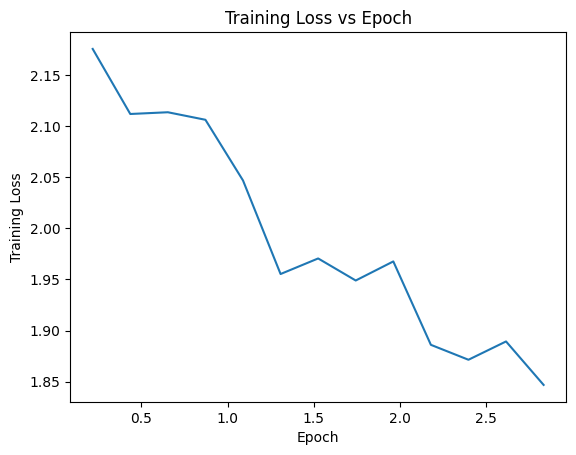

In [21]:
plt.figure()
plt.plot(steps[:len(train_loss)], train_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epoch")
plt.show()


In [30]:
import numpy as np
import torch

model.eval()

correct = 0
total = 0

for batch in trainer.get_eval_dataloader():
    batch = {k: v.to(model.device) for k, v in batch.items()}

    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    labels = batch["labels"]

    mask = labels != -100

    correct += ((predictions == labels) & mask).sum().item()
    total += mask.sum().item()

accuracy = correct / total
print("Accuracy:", accuracy)


Accuracy: 0.6180893159977389
